In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 

In [93]:
class Persona:
    def __init__(self,resource,productivity,science,wealth,income,saving,salary,InvestIncome,lifestatus,
                GainedInvest,PayInvest,WorkIncome,empleados,status,indice,production,clase,consumption):
        self.resource=resource
        self.productivity=productivity
        self.science=science
        self.wealth=wealth
        self.income=income
        self.saving=saving
        self.salary=salary
        self.InvestIncome=InvestIncome
        self.GainedInvest=GainedInvest
        self.PayInvest=PayInvest
        self.lifestatus=lifestatus #0->vivo #1-> muerto
        self.WorkIncome=WorkIncome
        self.empleados=empleados
        self.status=status #0->empleado #2->investor #1->ni empleado ni investor
        self.indice=indice
        self.production=production
        self.clase=clase
        self.consumption=consumption
    #asignar indice
    def a_indice(self,i):
        self.indice=i
    #calcular productivity
    def initial_productivity(self,mean,desviacion,t):
        p=random.gauss(mean,desviacion)
        if (p>0):
            self.productivity[t]=p
    #calcular production inicial
    def initial_production(self,t):
        self.production[t]=self.resource*self.productivity[t]*self.science
    def initial_wealth(self,i_wealth,t):
        self.wealth[t]=i_wealth
    def initial_saving(self,i_sav,t):
        self.saving[t]=i_sav
    #introducir empleados si es investor
    def guardar_empleado(self,identificador): #me va a guardar el indice de cada empleado
        self.empleados.append(identificador)

    


In [79]:
#calcular productividad para cada año
def c_productivity(agente,t):
        agente.productivity[t]=agente.productivity[t-1]

In [52]:
#calcular production
def c_production(agente,t):
    #for i in range(len(agentes)):
    produc=agente.resource*agente.productivity[t]*agente.science
    agente.production[t]=produc

In [4]:
#calcular workIncome
def c_workincome(agente,t):
    #for i in range(len(agentes)):
    if (agente.status==2): #si es inversionista
        agente.WorkIncome[t]=agente.production[t]
    if (agente.status==0): #si es empleado
        agente.WorkIncome[t]=agente.salary
    if (agente.status==1): #si no es empleado ni inversionista
        agente.WorkIncome[t]=agente.production[t]

In [5]:
#creamos una funcion para definir el investincome
def c_investincome(persona,agentes,t):
    invest=0
    #for j in range(len(agentes)):
    if (persona.status==2):
        for k in persona.empleados:
            invest=invest+agentes[k].production[t]-agentes[k].salary
        persona.InvestIncome[t]=invest


In [6]:
#creamos una funcion para el income
def c_income(agente,t):
    #for i in range(len(agentes)):
    inc=agente.WorkIncome[t]+agente.InvestIncome[t]
    agente.income[t]=inc

In [7]:
#creamos una funcion para wealth
def c_wealth(agente,t,tau):
    #for i in range(len(agentes)):
    w=agente.income[t]+agente.saving[t-1]*(1-1.0/tau)
    agente.wealth[t]=w

In [8]:
#creamos funcion de distribucion de clase [0 alive,1 enough,2 satisfied,3 luxury]
def dist_clase(lista_consumo,persona,agentes,t):
    #for i in range(len(agentes)):
    for s in range(len(lista_consumo)):
        if (s!=len(lista_consumo)-1):
            min=lista_consumo[s]
            max=lista_consumo[s+1]
            if (persona.wealth[t]>=min and persona.wealth[t]<max):
                persona.clase=s
        if (s==len(lista_consumo)-1):
            if (persona.wealth[t]>=max):
                 persona.clase=s
    if (persona.wealth[t]<lista_consumo[0]):
            ind=persona.indice
            #print(ind,t)
            broke_sale(ind,agentes,lista_consumo[0],5000,t)

In [9]:
#asignar consumo a cada uno
def asignar_consumo(agente,lista_consumo,t):
    l_desviaciones=[500,1500,4*10**4,2*10**5]
    #for i in range(len(agentes)):
    for s in range(len(lista_consumo)):
        if agente.clase==s:
            c=np.abs(random.gauss(0,l_desviaciones[s]))
            consumo=lista_consumo[s]+c
            if (consumo>=lista_consumo[s] and consumo<agente.wealth[t]):
                agente.consumption[t]=consumo
            if (consumo<lista_consumo[s] or consumo>agente.wealth[t]):
                agente.consumption[t]=lista_consumo[s]
            if (agente.wealth[t]<lista_consumo[0]): #si esta muerto
                agente.consumption[t]=0

In [10]:
#creamos funcion para contar el numero de agentes en cada clase
def conteo_clase(agentes,clase0,clase1,clase2,clase3,t):
    s0=0
    s1=0
    s2=0
    s3=0
    for i in range(len(agentes)):
        if agentes[i].clase==0:
            s0=s0+1
        if agentes[i].clase==1:
            s1=s1+1
        if agentes[i].clase==2:
            s2=s2+1
        if agentes[i].clase==3:
            s3=s3+1
    clase0[t]=s0
    clase1[t]=s1
    clase2[t]=s2
    clase3[t]=s3    

In [11]:
#funcion de interaccion tipo Broke sale
def broke_sale(i,agentes,e_alive,e_satisfied,t):
    
#for j in range(len(agentes)):
    if(agentes[i].wealth[t]<e_alive):
        j=random.randint(0,len(agentes)-1)
        expected_productivity=0
        expected_production=0
        if(i!=j and agentes[j].wealth[t]>=1*10**4):
            expected_productivity=np.divide(agentes[i].productivity[t]+agentes[j].productivity[t],2)
            expected_production=agentes[i].resource*expected_productivity*agentes[i].science
        #print('riqueza i antes de broke sale',agentes[i].wealth[t],t)
        if (expected_production-e_alive>0 and agentes[j].status!=0):
            #agentes[j].resource[t]=agentes[j].resource[t]+agentes[i].resource[t]
            #agentes[i].resource[t]=1
            #venta del recurso
            #print('riqueza j antes de broke sale',agentes[j].wealth[t])
            #print('i',i,'j',j,'t',t)
            agentes[i].GainedInvest[t]=e_alive
            #cambio en la energia
            #agentes[i].wealth[t]=agentes[i].wealth[t]+e_alive
            #agentes[j].wealth[t]=agentes[j].wealth[t]-e_alive
            #print('riqueza i despues bsale',agentes[i].wealth[t])
            #print('riqueza j despues bsale',agentes[j].wealth[t])
            #cambia la productividad
            agentes[i].productivity[t]=np.divide(agentes[i].productivity[t]+agentes[j].productivity[t],2)
            #agentes[i].c_production(t)
            agentes[i].salary=e_alive
            agentes[j].guardar_empleado(agentes[i].indice)
            setattr(agentes[i],'status',0)#cambiar status->empleado
            setattr(agentes[j],'status',2)#cambiar status->investor


In [74]:
#funcion para borrar personas que mueren
def borrar_agente(agente,e_alive,t):
    #for i in range(len(agentes)):
    if (agente.wealth[t]<e_alive and agente.status!=0):
        setattr(agente,'lifestatus',1) #pasar su estado a muerto
        #print('agente que murio',agente.indice)
        #print('life status agente muerto',agente.lifestatus)
        #print('año de muerte',t)


In [13]:
#calcular PayInvest
def pay_invest(persona,agentes,t):
    pi=0
    #for j in range(len(agentes)):
    if (persona.status==2):
        #print(agentes[j].indice)
        for k in persona.empleados:
            pi=pi+agentes[k].GainedInvest[t]
            #print('cada paso de tiempo',pi)
        persona.PayInvest[t]=pi
        #print('final pi',pi)
        pi=0
        #print('pi vaciado',pi)

In [14]:
#calcular saving
def c_saving(agente,t):
    sav=0
    #for i in range(len(agentes)):
        
    sav=agente.wealth[t]+agente.GainedInvest[t]-agente.consumption[t]-agente.PayInvest[t]
    #print(sav,t)
    agente.saving[t]=sav
    '''
        if (agentes[i].status==0):
            sav=agentes[i].wealth[t]-2500+agentes[i].GainedInvest[t]-agentes[i].consumption[t]-agentes[i].PayInvest[t]
            agentes[i].saving[t]=sav
        if (agentes[i].status==1 and agentes[i].wealth[t]>=2500):
            sav=agentes[i].wealth[t]+agentes[i].GainedInvest[t]-agentes[i].consumption[t]-agentes[i].PayInvest[t]
            agentes[i].saving[t]=sav
        if (agentes[i].status==1 and agentes[i].wealth[t]<2500):
            sav=0
            agentes[i].saving[t]=sav
        '''

In [94]:
#Inicializacion por defecto creamos un vector de objetos y lo llenamos
#random.seed(0)
poblacion=[]#array de objetos que tiene a cada persona
N=1*10**3
n_tsteps=40
empleados_per=[]
l_production=np.zeros(n_tsteps)
l_workincome=np.zeros(n_tsteps)
l_investincome=np.zeros(n_tsteps)
l_gainedinvest=np.zeros(n_tsteps)
l_payinvest=np.zeros(n_tsteps)
l_income=np.zeros(n_tsteps)
l_wealth=np.zeros(n_tsteps)
l_saving=np.zeros(n_tsteps)
l_consumption=np.zeros(n_tsteps)
l_productivity=np.zeros(n_tsteps)
l_alive=np.zeros(n_tsteps)
l_enough=np.zeros(n_tsteps)
l_satisfied=np.zeros(n_tsteps)
l_luxury=np.zeros(n_tsteps)
'''
Persona(self,resource,productivity,science,wealth,income,saving,salary,InvestIncome,lifestatus,
                GainedInvest,PayInvest,WorkIncome,empleados,status,indice,production,clase,consumption):
'''   
#para ---t=0-------
for i in range(N):
    per=Persona(1,l_productivity,1,l_wealth,l_income,l_saving,0,l_investincome,0,l_gainedinvest
                ,l_payinvest,l_workincome,empleados_per,1,0,l_production,0,l_consumption)
    poblacion.append(per) #introducimos cada objeto en el array
    poblacion[i].a_indice(i)#le asignamos su indice a cada uno
    poblacion[i].initial_productivity(5000,5000,0)#calculamos la productividad para cada uno mean y sd 5000
    poblacion[i].initial_production(0) #calculamos la produccion segun productivity
    poblacion[i].initial_wealth(5000,0)#asignamos inicialmente a todos la misma riqueza 5000
    poblacion[i].initial_saving(5000,0)#el mismo ahorro inicial 5000
    #poblacion[i].c_production(1)#calculamos la del año 1
    l_workincome=np.zeros(n_tsteps)
    l_production=np.zeros(n_tsteps)
    l_workincome=np.zeros(n_tsteps)
    l_investincome=np.zeros(n_tsteps)
    l_gainedinvest=np.zeros(n_tsteps)
    l_payinvest=np.zeros(n_tsteps)
    l_income=np.zeros(n_tsteps)
    l_wealth=np.zeros(n_tsteps)
    l_saving=np.zeros(n_tsteps)
    l_consumption=np.zeros(n_tsteps)
    l_productivity=np.zeros(n_tsteps)
    empleados_per=[]

In [ ]:
print(poblacion[0].production)
print(poblacion[1].production)
print(poblacion[2].production)

In [95]:
#----para t=1 hasta n_timesteps-1-----
#for t in range(1,n_timesteps,1):
#para t=1
random.seed(0)
lista_clase=[2500,7500,2*10**5,10**6]
for t in range(1,n_tsteps,1):
    for i in range(len(poblacion)):
        if (poblacion[i].lifestatus==0): #solo si esta vivo esta en la simulacion

            #---primer paso------(1)
            c_productivity(poblacion[i],t)
            c_production(poblacion[i],t)
            c_workincome(poblacion[i],t)
            c_investincome(poblacion[i],poblacion,t) 
            c_income(poblacion[i],t)
            c_wealth(poblacion[i],t,2)
            #---segundo paso-----(2) dist. clase
            dist_clase(lista_clase,poblacion[i],poblacion,t)
            borrar_agente(poblacion[i],lista_clase[0],t)
            c_production(poblacion[i],t)#calculamos de nuevo production pues cambio la productividad
            asignar_consumo(poblacion[i],lista_clase,t)
            #----tercer paso------(3)payinvest
            pay_invest(poblacion[i],poblacion,t)
            #----cuarto paso-----(4) saving
            c_saving(poblacion[i],t)
    conteo_clase(poblacion,l_alive,l_enough,l_satisfied,l_luxury,t)

for i in range(len(poblacion)):
    
    #print('workincome'+str(i),poblacion[i].WorkIncome)
    #print('investincome'+ str(i),poblacion[i].InvestIncome)
    #print('income'+str(i),poblacion[i].income)
    print('wealth'+str(i),poblacion[i].wealth)
    #print('clase'+str(i),poblacion[i].clase)
    #print('gainedinvest'+str(i),poblacion[i].GainedInvest)
    print('consumo'+str(i),poblacion[i].consumption)
    print('payinvest'+str(i),poblacion[i].PayInvest)
    print('empleados'+str(i),poblacion[i].empleados)
    print('saving'+str(i),poblacion[i].saving)
    print('status'+str(i),poblacion[i].status)
    print('production'+str(i),poblacion[i].production)
    print('productivity'+str(i),poblacion[i].productivity)
    print('lifestatus'+str(i),poblacion[i].lifestatus)

wealth0 [5000.         6032.01278596 5062.59032778 4377.19797071 4447.16742617
 4295.99637615 4281.94874251 3935.65697451 3987.63454484 3927.89931166
 4100.38859175 4156.18883968 4314.84696904 4151.06964788 4250.039018
 4247.21566661 4401.86693666 4111.94707649 4085.7475003  4115.93122012
 4058.79483231 4270.48342515 4318.00140775 4179.48508715 4340.69873019
 4179.84173853 4191.54307644 4144.52693158 4175.90003903 4090.92347124
 4229.84895494 4372.45150487 4435.90598824 4278.12377293 4119.33143132
 4275.66150875 4237.99983034 4021.61672956 4028.17559782 3980.802481  ]
consumo0 [   0.         2970.85770234 3372.21995828 2546.88869031 2919.20024579
 2796.12446306 3474.66036542 3024.41345677 3195.86149346 2791.14770009
 2852.03648432 2590.52047353 3076.73324522 2715.0171838  2819.63325671
 2507.50736522 3241.99835561 3004.47764783 2917.910632   3062.36712743
 2581.85355394 2698.50618157 3023.05680539 2562.1131987  3045.04082505
 2860.78115759 2966.5147852  2856.75242546 3058.07866847 2695

 2680.12430549 2598.82089806 3287.98762072 2738.98104989 2807.13291019]
payinvest41 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
empleados41 []
saving41 [5000.         4335.275922   3491.91377233 3200.53153488 3434.45746455
 3175.36030393 3285.56003817 3160.33349233 3372.82220883 2383.02874831
 2986.54276854 3304.15608428 3160.73562337 3112.26506792 3330.98077441
 2996.4440815  3334.18194144 3329.8327698  3317.25299146 2814.39284557
 3075.85241325 3069.18813332 3162.23588704 3408.67219987 2826.73905492
 3110.67587669 2255.78843771 2880.25733293 3099.51474963 2878.10156616
 2871.70203819 2658.41820416 2876.79836563 2727.23185732 3173.57984559
 3246.12962905 3363.70792821 2733.33035513 2967.14813942 3015.90517127]
status41 1
production41 [4339.46401175 4339.46401175 4339.46401175 4339.46401175 4339.46401175
 4339.46401175 4339.46401175 4339.46401175 4339.46401175 4339.46401175
 4339.46401175 4339.46401175 4339.

  652.91396919   14.86645818 4372.17212412  692.59562699   34.70728708]
status75 1
production75 [7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359]
productivity75 [7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40947359 7188.40947359 7188.40947359
 7188.40947359 7188.40947359 7188.40

 6991.00869049 6594.37122059 4801.17699349 5195.27309521 3092.67194332]
status108 1
production108 [12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042]
productivity108 [12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 12124.37342042 12124.37342042
 12124.37342042 12124.37342042 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
empleados145 []
saving145 [5000.         3297.50722928 2033.76655714 2254.84955635 2114.22013965
 1655.87087068 2001.50011734 2134.98950238 2150.28348822  940.8587555
 1417.18366473 1532.06696874 1992.26985566 2196.19319757 2318.81580482
 1911.79585155 2186.6687533  1709.49798432 1807.54772659 2128.26269838
 1450.87385074 1520.12071744 1752.95992181 1690.18918859 1871.30509812
 2072.95323599 1414.42960583 1225.49310041 1416.57400155 1552.81838376
 1815.02083191  330.31603133 1401.9242081  1490.75923788 1732.79992927
 1407.26335619 1412.89096437 1873.9722736  1902.91472398 1693.04687123]
status145 1
production145 [3745.03861921 3745.03861921 3745.03861921 3745.03861921 3745.03861921
 3745.03861921 3745.03861921 3745.03861921 3745.03861921 3745.03861921
 3745.03861921 3745.03861921 3745.03861921 3745.03861921 3745.03861921
 3745.03861921 3745.03861921 3745.03861921 3745.03861921 3745.03861921
 3745.03861921 3745.03861921 3745.03861921 374

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
lifestatus183 1
wealth184 [ 5000.         12605.94590951 11724.46858749 10797.68255557
 10426.43321616 10823.89077913 11500.25839072 11592.04817816
 11966.20241601 11531.15399782 11920.81282343 11204.33918754
 10928.99954018 11412.41970805 11055.15458777 11683.42886549
 11882.63915368 11941.95611478 11288.45217356 11253.38643198
 10997.98369734 11221.54199215 11958.3095221  11698.89800024
 10867.20705712 11282.76881875 11194.43717055 11658.68476203
 10781.20753587 11320.99729964 11634.18311033 11145.28484354
 10967.80493699 11107.7928577  11698.97524374 10920.56701051
 11621.22715573 12054.36308689 11321.69498215 12005.93838957]
consumo184 [    0.          9368.90055354 10340.99529536 10156.70794225
  8990.54347691  8035.2658167   8528.0538534   7871.53516516
  9115.78623938  7901.42016998  9724.02626735  9558.2319262
  8316.0519431   9514.00235151  7900.18867579  8130.04237715
  8210.61874313  9576.94358667  8993.57112862  9469.3108563

productivity222 [5769.74337505 5769.74337505 5769.74337505 5769.74337505 5769.74337505
 5769.74337505 5769.74337505 5769.74337505 5769.74337505 5769.74337505
 5769.74337505 5769.74337505 5769.74337505 5769.74337505 5769.74337505
 5769.74337505 5769.74337505 5769.74337505 5769.74337505 5769.74337505
 5769.74337505 5769.74337505 5769.74337505 5769.74337505 5769.74337505
 5769.74337505 5769.74337505 5769.74337505 5769.74337505 5769.74337505
 5769.74337505 5769.74337505 5769.74337505 5769.74337505 5769.74337505
 5769.74337505 5769.74337505 5769.74337505 5769.74337505 5769.74337505]
lifestatus222 0
wealth223 [5000.         9640.19982458 7734.76778606 7257.58371761 9306.43456925
 7542.5333392  7161.46649418 9270.12657527 8022.55069683 7401.475173
 9251.5197063  7764.42954749 7272.41459833 9189.86289481 7967.74546257
 7374.07255587 8955.00411982 7267.10163909 9505.41259131 8048.22532282
 7414.31248599 9270.62542748 8025.51253832 7402.95609374 9271.48935769
 8016.51565326 7348.24084226 9498.87

 6393.36156893 6393.36156893 6393.36156893 6393.36156893 6393.36156893]
productivity263 [6393.36156893 6393.36156893 6393.36156893 6393.36156893 6393.36156893
 6393.36156893 6393.36156893 6393.36156893 6393.36156893 6393.36156893
 6393.36156893 6393.36156893 6393.36156893 6393.36156893 6393.36156893
 6393.36156893 6393.36156893 6393.36156893 6393.36156893 6393.36156893
 6393.36156893 6393.36156893 6393.36156893 6393.36156893 6393.36156893
 6393.36156893 6393.36156893 6393.36156893 6393.36156893 6393.36156893
 6393.36156893 6393.36156893 6393.36156893 6393.36156893 6393.36156893
 6393.36156893 6393.36156893 6393.36156893 6393.36156893 6393.36156893]
lifestatus263 0
wealth264 [ 5000.         12295.38630617 11931.92307231 11595.76748475
 11834.97696605 11500.02154222 10361.25657854 11186.32935267
 11146.99925297 10838.72995754 11464.75128494 10700.80459828
 10989.84985086 11320.08252695 11224.54377802 11620.22335411
 11681.89503325 11790.50837917 10433.14127781 11261.95694507
 11617.87365

 8970.75057893 8970.75057893 8970.75057893 8970.75057893 8970.75057893]
productivity303 [8970.75057893 8970.75057893 8970.75057893 8970.75057893 8970.75057893
 8970.75057893 8970.75057893 8970.75057893 8970.75057893 8970.75057893
 8970.75057893 8970.75057893 8970.75057893 8970.75057893 8970.75057893
 8970.75057893 8970.75057893 8970.75057893 8970.75057893 8970.75057893
 8970.75057893 8970.75057893 8970.75057893 8970.75057893 8970.75057893
 8970.75057893 8970.75057893 8970.75057893 8970.75057893 8970.75057893
 8970.75057893 8970.75057893 8970.75057893 8970.75057893 8970.75057893
 8970.75057893 8970.75057893 8970.75057893 8970.75057893 8970.75057893]
lifestatus303 0
wealth304 [ 5000.         10126.39602433  7882.79166411  7817.79185639
  7785.29195253  7769.04200059  7686.75873321  7719.77539094
  7736.2837198   7744.53788423  7748.66496645  7750.72850756
  7751.76027811  7688.43112825  7720.61158846  7736.70181856
  7744.74693361  7748.76949114  7750.7807699   7751.78640928
  7752.28922

payinvest345 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
empleados345 []
saving345 [5000.          245.83710315  789.40924229    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
status345 1
production345 [666.49069072 666.49069072 666.49069072   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.    

 12661.72221329 12455.60430744 11168.12027449 10931.23588162]
status376 1
production376 [14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231]
productivity376 [14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.67440231 14696.67440231
 14696.67440231 14696.67440231 14696.6744

    0.    0.    0.    0.]
status412 1
production412 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
productivity412 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
lifestatus412 1
wealth413 [ 5000.         10262.93515913  8735.08922871  7803.87808975
  7914.87420401  7970.37226114  7998.1212897   8011.99580399
  8018.93306113  8022.4016897   8024.13600398  8025.00316113
  8025.4367397   8025.65352898  8025.76192363  8025.81612095
  8025.84321961  8025.85676894  8025.8635436   8025.86693094
  8025.8686246   8025.86947144  7964.03728267  7994.95380047
  8010.41205937  8018.14118882  8022.00575354  8023.93803591
  8024.90417709  8025.38724768  8025.62878297  7920.59031655
  7973.23031741  7999.55031784  7926.36289437  7976.11660632
  8000.99346229  8013.43189028  8019.65110427  8022.76071127]
consumo413 [   0.         8318.62701999 8653.2033

empleados444 []
saving444 [5000.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]
status444 1
production444 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
productivity444 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
lifestatus444 1
wealth445 [ 5000.         16752.53115075 18375.61465165 19548.5982688
 19206.92154569 19808.06008799 20346.88776132 20369.72913089
 20161.51137088 20401.63835147 19283.43223825 19327.3924282
 18883.24480973 19710.14231574 18214.55970329 18809.50385365
 19883.07535428 20415.35680967 20206.12332187 20148.29751705
 20141.4344172  20222.82225314 20579.11811287 20512.39639621
 20514.91137622 20377.06452877 19330.14614204 19105

 6101.13744013 7224.92316844 7754.97665058 5880.31003754 7347.39627482]
consumo478 [   0.         7997.89056535 3169.00635731 3144.76046562 7500.
 2968.66725108 2734.4403069  7936.32890539 2930.68945531 2892.16574881
 7862.85456924 3292.20098566 2762.80477391 7500.         2830.48674092
 2690.34853342 7864.29684974 3278.37990311 2838.34834772 7738.57639395
 2923.95678435 2581.2953998  7919.54960042 2766.9009097  3052.90955995
 7500.         3318.60523201 2772.28720734 7500.         2554.56179982
 3338.33858021 7500.         2612.73977217 2512.57203689 7500.
 3156.93452776 3220.61329178 7500.         2691.1609124  2785.79307751]
payinvest478 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
empleados478 []
saving478 [5000.          254.9311469  2711.28092839 3963.70171083  234.67256767
 2901.490745   4469.12677786   51.05619579 2847.66035483 4284.48614086
   32.21021344 2476.72583331 4228.379855    367.01163975 310

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
empleados512 []
saving512 [5000.           30.10991429 2119.97037273 2866.46812789 3916.54864415
 4035.42047425 4295.90059481 4353.2378432  4656.9816316  4557.36848427
 4706.7700645  4523.46694836 4140.17259117 3580.44862183 4129.75178863
 3545.29069094 3760.44134744 4384.21204165 4039.0257234  3934.10643682
 4012.86660911 4106.3559204  4561.11743127 4777.09853479 4384.65581444
 4204.63444836 3993.03425451 3876.52090825 3959.81303246 3503.27707754
 3777.95994503 4099.1268607  4437.37646988 4468.75857291 4643.57574989
 4529.52742507 3666.11709316 4136.22934073 4571.62316165 4523.96842288]
status512 1
production512 [5030.10991429 5030.10991429 5030.10991429 5030.10991429 5030.10991429
 5030.10991429 5030.10991429 5030.10991429 5030.10991429 5030.10991429
 5030.10991429 5030.10991429 5030.10991429 5030.10991429 5030.10991429
 5030.10991429 5030.10991429 5030.10991429 5030.10991429 5030.10991429
 5030.10991429 5030.10991429 5030.10991429 50

status546 1
production546 [11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633]
productivity546 [11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015633 11691.28015633
 11691.28015633 11691.28015633 11691.28015

status578 1
production578 [2071.48262505 2071.48262505 2071.48262505 2071.48262505    0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
productivity578 [2071.48262505 2071.48262505 2071.48262505 2071.48262505    0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    

 13129.94823166 10522.72340133 13212.60110636 13289.33505232]
status611 1
production611 [15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781]
productivity611 [15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.21325781 15535.21325781
 15535.21325781 15535.21325781 15535.2132

   0.           0.           0.           0.           0.        ]
lifestatus644 1
wealth645 [5000.         3054.06517745  774.95677382    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
consumo645 [   0.        2612.2819847    0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.          

 6272.58201763 6272.58201763 6272.58201763 6272.58201763 6272.58201763]
productivity676 [6272.58201763 6272.58201763 6272.58201763 6272.58201763 6272.58201763
 6272.58201763 6272.58201763 6272.58201763 6272.58201763 6272.58201763
 6272.58201763 6272.58201763 6272.58201763 6272.58201763 6272.58201763
 6272.58201763 6272.58201763 6272.58201763 6272.58201763 6272.58201763
 6272.58201763 6272.58201763 6272.58201763 6272.58201763 6272.58201763
 6272.58201763 6272.58201763 6272.58201763 6272.58201763 6272.58201763
 6272.58201763 6272.58201763 6272.58201763 6272.58201763 6272.58201763
 6272.58201763 6272.58201763 6272.58201763 6272.58201763 6272.58201763]
lifestatus676 0
wealth677 [5000.         5764.69052297 4669.14689634 4300.27047366 4080.87263019
 3912.72937081 3800.73858685 3663.30556786 3835.79616725 3860.58796627
 3457.1472595  3430.44621986 3395.25907204 3398.13814455 3713.75959525
 3828.45197969 3478.55001555 3680.0202995  3676.80851363 3801.07679646
 3505.54554523 3641.38702608 3469

 3881.47853495 3881.47853495 3881.47853495 3881.47853495 3881.47853495]
lifestatus713 0
wealth714 [5000.         9609.94823468 8164.92235201 7430.69452881 9383.66634296
 7771.17098423 7245.53372679 9414.21059917 8067.05353426 7393.47500181
 9421.93165756 7365.36788304 9482.57133887 7769.59691873 7244.74669404
 9304.84165584 7840.8438264  7280.37014788 9180.03720554 7949.96683744
 7334.9316534  9205.24245423 7962.56946179 7341.23296557 9258.6562034
 7249.39327736 9338.25001295 7852.64441021 7149.97426022 9227.5365333
 7795.370034   7225.72327403 9221.00028521 7292.57282315 9348.34110636
 8034.11878786 7150.5459265  9387.46161181 7609.33791866 7164.61719401]
consumo714 [   0.         7500.         7523.42976374 2883.25831225 8061.22084385
 7500.         2637.00899781 7500.         7500.         2769.50815605
 8911.09236082 2620.12167465 8163.27397076 7500.         2854.95985171
 7843.05047239 7500.         3140.19220615 7500.         7500.
 3144.34321429 7500.         7500.         3043.

status751 1
production751 [10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861]
productivity751 [10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468.9069861 10468.9069861 10468.9069861
 10468.9069861 10468.9069861 10468

payinvest789 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
empleados789 []
saving789 [ 5000.         11583.87110672 14152.54333623 15695.01812235
 15903.18287106 15427.89842272 15477.14066831 14749.57985303
 14705.7368033  14829.43338719 16391.23911131 15673.41288189
 16304.73857505 16139.36568761 14480.23191625 13853.65737237
 14267.20032388 15736.94821834 16740.83866812 17696.06645744
 16327.74771612 16607.6594411  16235.90375451 17431.54595188
 15860.10970756 16179.03452211 17398.13871665 16794.52753584
 17083.51657096 17379.35538257 17770.02259723 17306.14306813
 16238.37340996 14239.85704914 15321.50373828 14007.64768956
 13997.31481217 15908.36445918 16507.31706856 16639.59316938]
status789 1
production789 [16846.68689039 16846.68689039 16846.68689039 16846.68689039
 16846.68689039 16846.68689039 16846.68689039 16846.68689039
 16846.68689039 16846.68689039 16846.68689039 16846.68689039
 16846.68689039 16

   0.           0.           0.           0.           0.        ]
productivity821 [185.03260427 185.03260427 185.03260427   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
lifestatus821 1
wealth822 [5000.         7581.17773501 5121.76660251 6233.53760769 6877.46275623
 6592.42819643 6791.04014902 7119.15458328 7357.58363547 7498.92026952
 7567.31070848 5114.83308925 6299.79664247 6747.04068326 7133.56243343
 7311.65502343 7411.46555565 7519.10080143 5090.72813572 6082.79503336
 6782.98047848 6359.7854453  6696.34231217 7123.9002752  7196.51124239
 7072.25531754 6933.03933666 7289.44550533 7465.48239304 7190.0

payinvest861 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
empleados861 []
saving861 [5000.           23.02242896  514.6974547     0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
status861 1
production861 [503.18624021 503.18624021 503.18624021   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.    

productivity894 [12410.43562409 12410.43562409 12410.43562409 12410.43562409
 12410.43562409 12410.43562409 12410.43562409 12410.43562409
 12410.43562409 12410.43562409 12410.43562409 12410.43562409
 12410.43562409 12410.43562409 12410.43562409 12410.43562409
 12410.43562409 12410.43562409 12410.43562409 12410.43562409
 12410.43562409 12410.43562409 12410.43562409 12410.43562409
 12410.43562409 12410.43562409 12410.43562409 12410.43562409
 12410.43562409 12410.43562409 12410.43562409 12410.43562409
 12410.43562409 12410.43562409 12410.43562409 12410.43562409
 12410.43562409 12410.43562409 12410.43562409 12410.43562409]
lifestatus894 0
wealth895 [5000.         9081.41003591 6635.57772    8164.4140041  6586.94336512
 8514.75911951 7088.78959567 8787.99472906 7190.99228277 8859.63637422
 6916.24063756 8634.16596948 7148.49302065 8809.39881091 6592.74635997
 8554.8655948  7108.84283331 8834.62352823 7128.38240308 8643.5175786
 7143.3530626  8780.849495   6976.23596034 8466.66458642 7064.74

empleados936 []
saving936 [5000.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]
status936 1
production936 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
productivity936 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
lifestatus936 1
wealth937 [5000.         2500.            0.         3750.         2972.10210535
 2603.18025334 2551.59012667 2525.79506333 2512.89753167 2506.44876583
 2503.22438292 2501.61219146 2500.80609573 2500.40304786 2500.20152393
 2500.10076197 2500.05038098 2500.02519049 2500.01259525 2500.00629762
 2500.00314881 2500.00157441 2500.0007872  2500.0003936  2500.0001968
 2500.0000984  2500.0000492  2500.0000246  2500.0000123  2500

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
empleados965 []
saving965 [5000.          571.61070387 1170.96604006    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
status965 1
production965 [885.16068812 885.16068812 885.16068812   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.      

In [68]:
print(poblacion[50].WorkIncome[5])

0.0


In [96]:
#lista producticity inicial
l_pro=[]
for l in range(len(poblacion)):
    l_pro.append(poblacion[l].productivity[0])


Text(0.5, 1.0, 'Distribucion de productividad año 0')

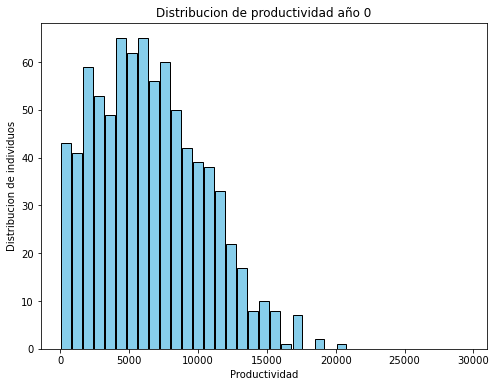

In [97]:
fig = plt.figure(figsize=(8,6))
intervalos=range(1,30000,800)
plt.hist(l_pro,bins=intervalos,color="skyblue",rwidth=0.85,lw=1,edgecolor='black')
plt.xlabel('Productividad')
plt.ylabel('Distribucion de individuos')
plt.title('Distribucion de productividad año 0')
#fig.savefig('productividadinicial.png')

In [98]:
lista_t=[]
for l in range(0,n_tsteps,1):
    lista_t.append(l)
print(lista_t)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


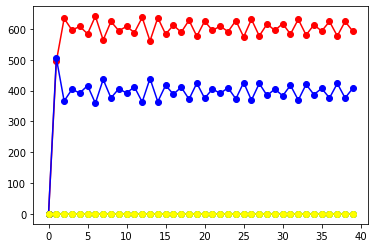

In [99]:
plt.plot(lista_t,l_alive,color='red',marker='o')
plt.plot(lista_t,l_enough,color='blue',marker='o')
plt.plot(lista_t,l_satisfied,color='green',marker='o')
plt.plot(lista_t,l_luxury,color='yellow',marker='o')